# Lecture 20

## 9.1: Module 9 Notebook 1 ##

In [1]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Prediction ##

In [ ]:
# As we saw in Section 7.1, Galton studied how physical characteristics 
#are passed down from one generation to the next.

#The primary reason for collecting the data was to be able to 
#predict the adult height of a child born to parents 
#similar to those in the dataset.

# Let's go through it again

In [3]:
#First, we load the data
galton = Table.read_table('galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


In [4]:
# Now, let's read only the heights columns
heights = Table().with_columns(
    'MidParent', galton.column('midparentHeight'),
    'Child', galton.column('childHeight')
    )

In [5]:
# and show the reduced table
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


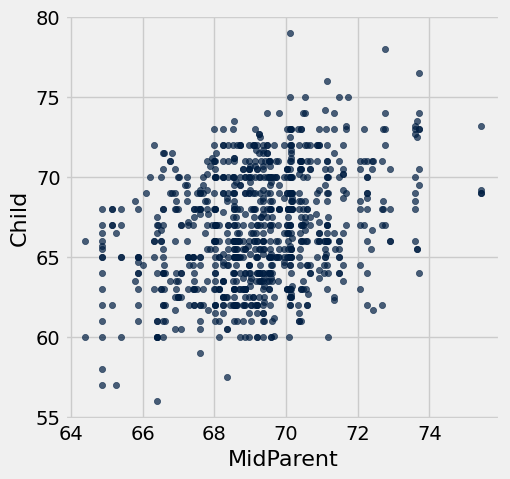

In [6]:
# Let's also visualize the heights on a scatter plot
heights.scatter('MidParent')

In [ ]:
# Like we did previously, Our approach is
# to base the prediction (of the adult child's heaight) 
# on all the points that correspond to a midparent height 
# of around the midparent height of the new person

# The function predict_child below does this.
# It takes a midparent height as its argument 
# and returns the average height of all the children 
# who had midparent heights within half an inch of the argument.


In [7]:
def predict_child(h):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of h.
    
    The prediction is the average height of the children 
    whose midparent height is in the range h plus or minus 0.5 inches.
    """
    
    close_points = heights.where('MidParent', are.between(h-0.5, h + 0.5))
    return close_points.column('Child').mean()   

In [8]:
# Let's apply the predict_child() fucntion 
# to the midparent height column

# We will save the results in the Prediction column
# in the heights_with_predictions table
heights_with_predictions = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
    )

In [9]:
heights_with_predictions

MidParent,Child,Prediction
75.43,73.2,70.1
75.43,69.2,70.1
75.43,69,70.1
75.43,69,70.1
73.66,73.5,70.4158
73.66,72.5,70.4158
73.66,65.5,70.4158
73.66,65.5,70.4158
72.06,71,68.5025
72.06,68,68.5025


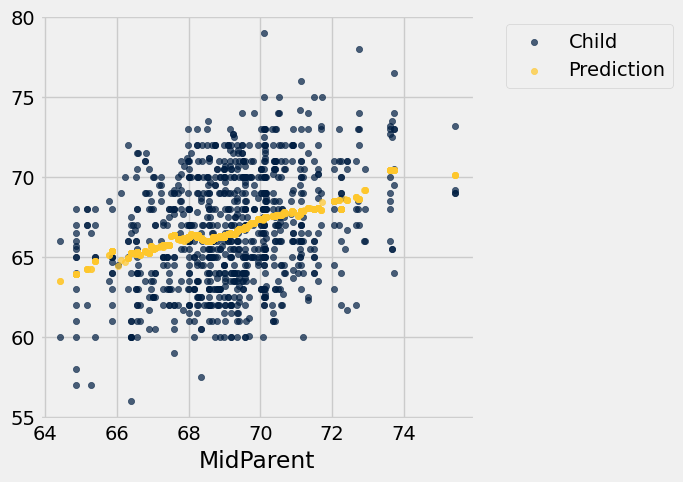

In [10]:
# Finally, let's visualize the predictions on a scatter plot

# Question: what will this scatter plot contain? Which values?
# heights_with_predictions
heights_with_predictions.scatter('MidParent')
# what do you notice about this graph? 
# in particular, what do you notice about prediction?

In [ ]:
# The prediction at a given midparent height 
# lies roughly at the center of the vertical strip 
# of points at the given height. 

# This method of prediction is called regression

## Association ##

In [ ]:
# Let's examine association of two variable through an example.

In [ ]:
# First, we load the dataset.

# The hybrid dataset contains data on hybrid 
# passenger cars sold in the United States 
# from 1997 to 2013
hybrid = Table.read_table('hybrid.csv')

In [ ]:
# let's see what's in it
hybrid

In [ ]:
# Next, we will examine the 
# association between price and fuel efficiency

# Let's first sort the table, 
# with the most expensive cars at the top
hybrid.sort('msrp', descending=True)

In [ ]:
# Now, let's scatter the price (y-axis), 
# against fuel use(x-axis)
hybrid.scatter('mpg', 'msrp')
# what do we notice?
# 1) is there a trend? if so, what kind?
# 2) what's the shape of the scatter like? (Linear/non-linear?)

In [ ]:
# We find that the association between price and mpg is *negative*
# the scatter diagram also shows 
# a *non-linear* relation between the two variables. 
# The points appear to be clustered around a curve, not around a straight line.

# P.S. the graph above might seem unintuitive until you remember that 
# sporty cars, have a higher acceleration rate, and therefore a lower mileage, 
# i.e., they are less fuel efficient

In [ ]:
# Now, let's examine a different association.
# The association of price with acceleration.

# Let's plot a scatter diagram of price (y-axis) against acceleration(x-axis)
hybrid.scatter('acceleration', 'msrp')

# Now, what do we see? How is the association different? 
# 1) by trend
# 2) by pattern, i.e., linear or non-linear

In [ ]:
# Let's now drill deeper, and examine the association between 
# 1) price and mileage and 
# 2) price and acceleration, 
# but only for SUVs in the dataset.

# First, we isolate the SUVs from the hybrid dataset 
# and save them in a table called suv
suv = hybrid.where('class', 'SUV')
suv.num_rows

In [ ]:
# Let's now visualization the association 
# between price and acceleration
suv.scatter('acceleration', 'msrp')

# same as above, this association is positive, and linear

In [ ]:
# Let's also visualization the association 
# between price and fuel efficiency
suv.scatter('mpg', 'msrp')

# same as above, this association is negative
# NEW here: the association is linear

In [ ]:
# Notice that thus far, we have been able to
# derive useful information from the general orientation 
# and shape of a scatter diagram 

# **even without paying attention to the units**
# in which the variables were measured

In [ ]:
# To enable us to compare the degree of linearity 
# in two scatter diagrams, we can scatter, the values of the variables
# in standard units

In [ ]:
# This is the standard units function 
# we created in a previous class
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x)) / np.std(x)

In [ ]:
# Now, let's compute the standard units of fuel use and price of SUVs
# and add them to a table
# and visualize a scatter diagram
# of price against fuel use (as done above)
Table().with_columns(
    'mpg (standard units)',  standard_units(suv.column('mpg')), 
    'msrp (standard units)', standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

# Notice that the association and trend are the same as above,
# However, the y and x axis values now are in standard units, i.e., z

In [ ]:
# We can repeat the same process as above
# for the visualization of 
# price against acceleration for SUVs
Table().with_columns(
    'acceleration (standard units)', standard_units(suv.column('acceleration')), 
    'msrp (standard units)',         standard_units(suv.column('msrp'))
).scatter(0, 1)
plots.xlim(-3, 3)
plots.ylim(-3, 3);

In [ ]:
# Since we can now compare these 2 scatter plots, 
# what do we observe? Anything different between them? 
# Besides the trend of the association


# It is clearer now, while both associations are linear,
# the one between price and acceleration is a little more fuzzy
# that of price against fuel efficiency 

## Correlation ##

In [ ]:
# The function below, r_scatter, will **simulate**
# a scatter plot with a correlation very close to r.
# Because of randomness in the simulation, 
# the correlation is not expected to be exactly equal to r

# it takes a value of r as its argument 

# for now, ignore how exactly r is computed, we will get to that next.
# let's use the function to visualize scatter plots of 
# different values of r

In [ ]:
def r_scatter(r):
    plots.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)

In [ ]:
r_scatter(-1)
# r = -1 the scatter plot is *perfectly linear* and *slopes downward*

In [ ]:
r_scatter(1)
# r = 1 the scatter plot is *perfectly linear* and *slopes upward*

In [ ]:
r_scatter(0.9)

In [ ]:
r_scatter(0.8)

In [ ]:
r_scatter(0.7)

In [ ]:
r_scatter(0.5)

In [ ]:
r_scatter(-0.5)

In [ ]:
r_scatter(0)

# r = 0, the scatter plot is a formless cloud 
# around the horizontal axis.
# The variables are *uncorrelated*, 
# i.e., they have NO LINEAR association

### Calculating $r$ ##

In [ ]:
# Let's write some code, to compute r

In [ ]:
# First, let's create a table of data to play with
x = np.arange(1, 7, 1) # what are the values of x?
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

In [ ]:
# Let's scatter our data, y against x

# Remember: visualize, then, quantify
t.scatter('x', 'y', s=30, color='red')

In [ ]:
# Now, let's convert values of x, and y, into standard units.

# Remember, r is computed on the standard units o
# f the values of the variables
t = t.with_columns(
        'x (standard units)', standard_units(x),
        'y (standard units)', standard_units(y)
    )
t

In [ ]:
# Once, we convert x, and y, to standard units,
# next step of the formula of r,
# is to compute the product of x, and y (in standard units).

t = t.with_columns('product of standard units', t.column(2) * t.column(3))
t

In [ ]:
#Finally, r is the average of the products of the standard units

r = np.average(t.column(2) * t.column(3))
r

In [ ]:
# We can put the 3 steps into one function.
# we'll name it, correlation

def correlation(t, x, y):
    """t is a table; x and y are column labels"""
    x_in_standard_units = standard_units(t.column(x))
    y_in_standard_units = standard_units(t.column(y))
    return np.average(x_in_standard_units * y_in_standard_units)

In [ ]:
# Let's make sure it's working correctly.
# It should return the value we obtained above; 0.617

correlation(t, 'x', 'y')

In [ ]:
# Now, that our function is working well,
# let's compute the correlation coefficient 
# (correlation in short)
# of price and fuel efficiency of SUVs in the hybrid dataset

# Question 1: what sign do we expect r to have here?
# Question 2: how big do we expect r to be?
correlation(suv, 'mpg', 'msrp')

In [ ]:
# let's compute the same for
# price and fuel efficiency

# same questions as above:
# Question 1: what sign do we expect r to have here?
# Question 2: how big do we expect r to be?
correlation(suv, 'acceleration', 'msrp')

### Switching Axes ###

In [ ]:
# Let's recompute r of x, and y, in table t, 
# passing x as the first variable
correlation(t, 'x', 'y')

In [ ]:
# now, let's scatter y (y-axis) against x (x-axis)
t.scatter('x', 'y', s=30, color='red')

In [ ]:
# Now, let's reverse the axes of the scatter plot
# We are plotting x (y-axis) against y (x-axis)

t.scatter('y', 'x', s=30, color='red')

# Notice that, this graph is a reflection of the one above, 
# about the line y=x

In [ ]:
# Finally, let's confirm that r doesn't change when
# we pass 'y' as the first variable
correlation(t, 'y', 'x')

## Nonlinearity ###

In [ ]:
# Correlation measures only one kind of association – linear
# Variables that have strong non-linear association 
# might have very low correlation, 

# e.g., those with a quadratic relation

In [ ]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=30, color='r')

In [ ]:
correlation(nonlinear, 'x', 'y')

## Outliers ###

In [ ]:
# Outliers can have a big effect on correlation.
# Let's look at an example where a scatter plot for which 
# r = 1,
# is turned into a plot for which 
# r = 0, 

# by the addition of just one outlying point.

In [ ]:
# this is a perfect linear relation sloping upwards
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4)
    )
line.scatter('x', 'y', s=30, color='r')

In [ ]:
# compute r, should be 1
correlation(line, 'x', 'y')

In [ ]:
# we add a new point with x= 5 and y= 0
# the point (5,0) is an outlier, 
# in relation to the distribution of the previous point

# Notice how far away it is from the line 
# connecting the other 4 points

outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=30, color='r')

In [ ]:
# now let's compute r after adding the point (5,0)
correlation(outlier, 'x', 'y')

In [ ]:
# second example, another outlier. 
# This time, the point (3, -2) is the outlier

outlier2 = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, -2, 4, 5)
    )
outlier2.scatter('x', 'y', s=50, color='r')

In [ ]:
correlation(outlier2, 'x', 'y')

## Ecological Correlations ###

In [ ]:
# Correlations based on aggregates and averages 
# are called ecological correlations 
# and are frequently reported.

In [ ]:
# Correlations based on aggregated data can be misleading.
# For instance, if we examined the correlation between
# average SAT scores for various US states, and found an association,
# the association (and strength of the that relation) 
# would NOT be reflecting the scores of *students*. 

# There is only 1 point per state, students scores will vary.
# Some will be higher than the average and some lower.

In [ ]:
sat2014 = Table.read_table('sat2014.csv').sort('State')
sat2014

In [ ]:
sat2014.scatter('Critical Reading', 'Math')

In [ ]:
correlation(sat2014, 'Critical Reading', 'Math')

In [ ]:
# The overall picture of the strength of the relation 
# between the Math and Critical Reading scores of 
# students will be more fuzzy.

# The correlation between the Math and 
# Critical Reading scores of the students will 
# be lower than the value calculated based on state averages.

In [ ]:
# Ex. 2 of ecological correlations

In [ ]:
election16 = Table.read_table('election2016_state.csv')
election16

In [ ]:
election16.scatter('Median Income', 'Percent voting for Clinton')

In [ ]:
party = Table.read_table('party_affiliation2016.csv')
party

In [ ]:
party.exclude(6).barh('Income')